<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [5]:
sac_csv = '../../data/sacramento_real_estate_transactions.csv'

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [84]:
df = pd.read_csv(sac_csv, index_col = 'sale_date')

In [85]:
df.head()

,beds,baths,sq__ft,price
sale_date,,,,
Wed May 21 00:00:00 EDT 2008,2,1,836,59222
Wed May 21 00:00:00 EDT 2008,3,1,1167,68212
Wed May 21 00:00:00 EDT 2008,2,1,796,68880
Wed May 21 00:00:00 EDT 2008,2,1,852,69307
Wed May 21 00:00:00 EDT 2008,2,1,797,81900


In [86]:
df[df['price'] < 0]

,beds,baths,sq__ft,price
sale_date,,,,
Fri May 16 00:00:00 EDT 2008,1,1,-984,-210944


In [87]:
# correcting inverted value
df.iloc[703,2] = df.iloc[703,2] * - 1
df.iloc[703,3] = df.iloc[703,3] * - 1

In [88]:
df.rename({'sq__ft':'sqft'}, axis=1, inplace=True)

In [89]:
df.describe()

,beds,baths,sqft,price
count,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1314.916751,234144.263959
std,1.307932,0.895371,853.048243,138365.839085
min,0.000000,0.000000,0.000000,1551.000000
25%,2.000000,1.000000,952.000000,145000.000000
50%,3.000000,2.000000,1304.000000,213750.000000
75%,4.000000,2.000000,1718.000000,300000.000000
max,8.000000,5.000000,5822.000000,884790.000000


In [90]:
# I'm dropping values where this is 0 because they appear to be invalid data, and I believe they will skew results
df = df[(df['beds'] > 0)
        & (df['baths'] > 0)
        & (df['sqft'] > 0)]

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a LR model. 

**For each of these variables you believe to be valid potential predictors in an LR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [91]:
feature_cols = ['beds','baths','sqft']

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


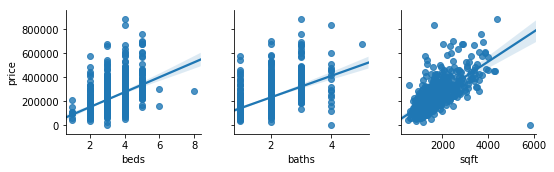

In [92]:
sns.pairplot(df, x_vars=feature_cols,y_vars='price', kind='reg');

### 4. Which variable would be the best predictor of Y in an LR model? Why?

In [93]:
lr = LinearRegression()

In [94]:
X = df[feature_cols]
y = df['price']

In [95]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
lr.intercept_

48672.16911114188

In [97]:
list(zip(feature_cols, lr.coef_))

[('beds', -12120.465074177215),
 ('baths', 4565.4670577747875),
 ('sqft', 132.70260893953562)]

In [ ]:
# baths appears to have the largest coefficient, and is theefore the strongest predictor

In [98]:
lr.score(X, y)

0.4847109277118392

In [75]:
X_std = (X - X.mean()) / X.std()

In [99]:
df['predicted'] = lr.predict(X)

In [105]:
df['residuals'] = df['price'] - df['predicted']

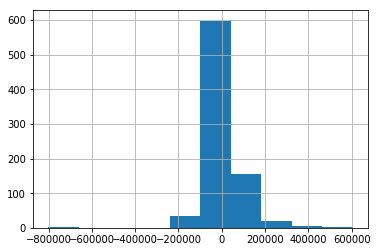

In [106]:
df['residuals'].hist();

In [107]:
df['residuals'].sum()

1.5832483768463135e-08

In [108]:
lr.score(X, y)

0.4847109277118392

In [112]:
ss_tot = sum((df['price'] - df['price'].mean())**2)
ss_tot

11673191135321.688

In [115]:
ss_res = sum(df['residuals']**2)
ss_res

6015067830762.302

In [116]:
1 - (ss_res / ss_tot)

0.48471092771183866

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A:

### Calculate the r-squared value, as well as the rmse, either by hand or through sklearn